In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import  accuracy_score,precision_score,classification_report,confusion_matrix,recall_score,f1_score
from sklearn.impute import  SimpleImputer
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import  Pipeline
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_preprocessed.csv')
dataset.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [5]:
dataset.shape

(308774, 19)

In [6]:
# Splitting dataset into Dependent and Independent Features
X = dataset.drop('Heart_Disease',axis=1)
y = dataset[['Heart_Disease']]

In [7]:
X.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [8]:
y.head()

,Heart_Disease
0,No
1,Yes
2,No
3,Yes
4,No


In [9]:
# Preprocessor Pipeline
General_Health_category = ["Poor",'Fair','Good','Very Good','Excellent'] 
Checkup_category = ['Never','Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago']
Exercise_category = ['No','Yes']
Skin_Cancer_category = ['No','Yes']
Other_Cancer_category = ['No','Yes']
Depression_category = ['No','Yes']
Diabetes_category = ['No','No, pre-diabetes or borderline diabetes','Yes, but female told only during pregnancy','Yes']
Arthritis_category = ['No','Yes']
Sex_category = ['Male','Female']
Age_Category_category = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']
Smoking_History_category = ['No','Yes']
numerical_features   = [col for col in X.columns if dataset[col].dtype!='O']
categorical_features = [col for col in X.columns if dataset[col].dtype=='O']
# categorical_features.remove('Heart_Disease')

In [10]:
categorical_features

['General_Health',
 'Checkup',
 'Exercise',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Smoking_History']

In [ ]:
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median'))
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OrdinalEncoder(categories=[General_Health_category,Checkup_category,Exercise_category,Skin_Cancer_category,Other_Cancer_category,Depression_category,Diabetes_category,Arthritis_category,Sex_category,Age_Category_category,Smoking_History_category])),
    ]
)


resample_pipeline = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_features),
    ('cat_pipeline',cat_pipeline,categorical_features)
])



In [ ]:
target_pipeline = Pipeline(
    steps= [
        (('imputer',SimpleImputer(strategy='most_frequent'))),
        ('encoder',OrdinalEncoder(categories=[['No','Yes']]))
    ]
)

In [ ]:
X.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
dataset.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
X_trans = pd.DataFrame(resample_pipeline.fit_transform(X))
y_trans = pd.DataFrame(target_pipeline.fit_transform(y))

In [ ]:
X_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0


In [ ]:
y_trans.head()

,0
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


## Resampling of dataset using SMOTE Technique.

In [ ]:
%pip install imblearn

     |████████████████████████████████| 235 kB 19.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.over_sampling import  SMOTE
resample = SMOTE()
resample

SMOTE()

In [ ]:
X_resample, y_resample = resample.fit_resample(X_trans,y_trans)

In [ ]:
X_resample.shape

(567606, 18)

In [ ]:
y_resample.shape

(567606, 1)

In [ ]:
X_resample.columns

RangeIndex(start=0, stop=18, step=1)

In [ ]:
X_resample.columns = cols
X_resample.head()

NameError: name 'cols' is not defined

In [ ]:
y_resample.columns = ['Heart_Disease']
y_resample.head()

,Heart_Disease
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [ ]:
dataset_final = pd.concat([X_resample,y_resample],axis=1)
dataset_final.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


In [ ]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567606 entries, 0 to 567605
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                567606 non-null  float64
 1   Checkup                       567606 non-null  float64
 2   Exercise                      567606 non-null  float64
 3   Skin_Cancer                   567606 non-null  float64
 4   Other_Cancer                  567606 non-null  float64
 5   Depression                    567606 non-null  float64
 6   Diabetes                      567606 non-null  float64
 7   Arthritis                     567606 non-null  float64
 8   Sex                           567606 non-null  float64
 9   Age_Category                  567606 non-null  float64
 10  Height_(cm)                   567606 non-null  float64
 11  Weight_(kg)                   567606 non-null  float64
 12  BMI                           567606 non-nul

In [ ]:
dataset_final.to_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_resampled.csv')

## Resampling of dataset is complete. Now, dataset is ready for model training and predictons.

In [ ]:
# Dependent and Independet features
X_resample.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0


In [ ]:
y_resample.head()

,Heart_Disease
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0


In [ ]:
# Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.30,random_state=42)

In [ ]:
X_train

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
428811,152.000000,61.112102,26.318853,0.000000,30.0,7.826621,8.173379,3.000000,1.0,0.043345,0.000000,0.043345,0.000000,3.000000,0.956655,1.0,10.086690,0.956655
483607,163.000000,77.110000,29.180000,0.000000,30.0,12.000000,2.573554,0.713223,1.0,0.356612,0.000000,0.643388,0.643388,0.000000,1.000000,1.0,9.000000,0.643388
229466,180.000000,86.180000,26.500000,8.000000,16.0,12.000000,0.000000,3.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,11.000000,0.000000
555456,178.000000,86.335616,27.309202,11.771153,30.0,11.542306,3.771153,3.114423,1.0,1.000000,0.000000,0.114423,0.000000,0.343270,0.885577,0.0,10.114423,1.000000
501034,180.094318,99.718632,30.632212,0.000000,8.0,2.062879,8.000000,0.125758,1.0,0.968561,0.000000,0.000000,0.968561,0.000000,0.968561,0.0,3.031439,0.031439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,185.000000,97.070000,28.230000,16.000000,20.0,12.000000,8.000000,3.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,9.000000,0.000000
259178,168.000000,90.720000,32.280000,4.000000,8.0,8.000000,16.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,5.000000,0.000000
365838,170.000000,70.871361,24.473358,0.752532,30.0,8.000000,0.000000,2.000000,1.0,1.000000,0.376266,0.376266,0.623734,1.128798,1.000000,0.0,12.000000,0.376266
131932,175.000000,92.990000,30.270000,2.000000,10.0,12.000000,8.000000,4.000000,2.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.000000,0.000000


In [ ]:
X_test

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
532448,168.522993,88.117674,31.108648,8.522993,4.000000,10.954013,5.045987,1.000000,1.00000,0.261497,0.0,0.000000,0.738503,2.215510,0.000000,0.000000,3.522993,0.738503
467457,184.877882,125.250784,36.695322,20.000000,17.502306,5.370965,4.000000,1.248847,1.00000,1.000000,0.0,0.000000,0.000000,1.126729,0.624424,0.000000,6.497694,0.375576
71649,175.000000,90.720000,29.530000,0.000000,8.000000,30.000000,4.000000,3.000000,1.00000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
212791,163.000000,72.570000,27.460000,20.000000,0.000000,12.000000,4.000000,2.000000,1.00000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000,1.000000
51599,178.000000,83.910000,26.540000,12.000000,90.000000,30.000000,12.000000,3.000000,1.00000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88720,165.000000,70.310000,25.790000,16.000000,30.000000,4.000000,15.000000,1.000000,1.00000,0.000000,0.0,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000
372037,174.014579,89.568453,29.593264,1.985421,20.000000,12.000000,5.014579,2.000000,3.50729,1.000000,0.0,0.000000,0.000000,1.478131,0.507290,0.000000,8.521869,0.000000
422507,181.960689,79.380000,23.965577,0.000000,90.000000,30.000000,4.732185,2.960689,1.00000,1.000000,1.0,0.000000,0.000000,0.000000,0.346437,0.000000,10.653563,0.346437
350027,173.000000,102.303418,34.290248,2.267493,16.000000,8.000000,3.267493,3.267493,1.00000,1.000000,0.0,0.732507,0.000000,0.000000,0.000000,0.732507,10.267493,0.267493


In [ ]:
y_train

,Heart_Disease
428811,1.0
483607,1.0
229466,0.0
555456,1.0
501034,1.0
...,...
110268,0.0
259178,0.0
365838,1.0
131932,0.0


In [ ]:
y_test

,Heart_Disease
532448,1.0
467457,1.0
71649,0.0
212791,0.0
51599,0.0
...,...
88720,0.0
372037,1.0
422507,1.0
350027,1.0


In [ ]:
# Transform the Dependent features using preprocessor pipeline ;   encoder.pkl(resample pipeline of above for car ftures) then scaler.pkl(in  data transfrm pipeline after data is encoded )


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

AttributeError: 'GaussianNB' object has no attribute 'intercept_'

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.49870802551062354

In [ ]:
df = pd.read_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_resampled.csv')
df.head()

,Unnamed: 0,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


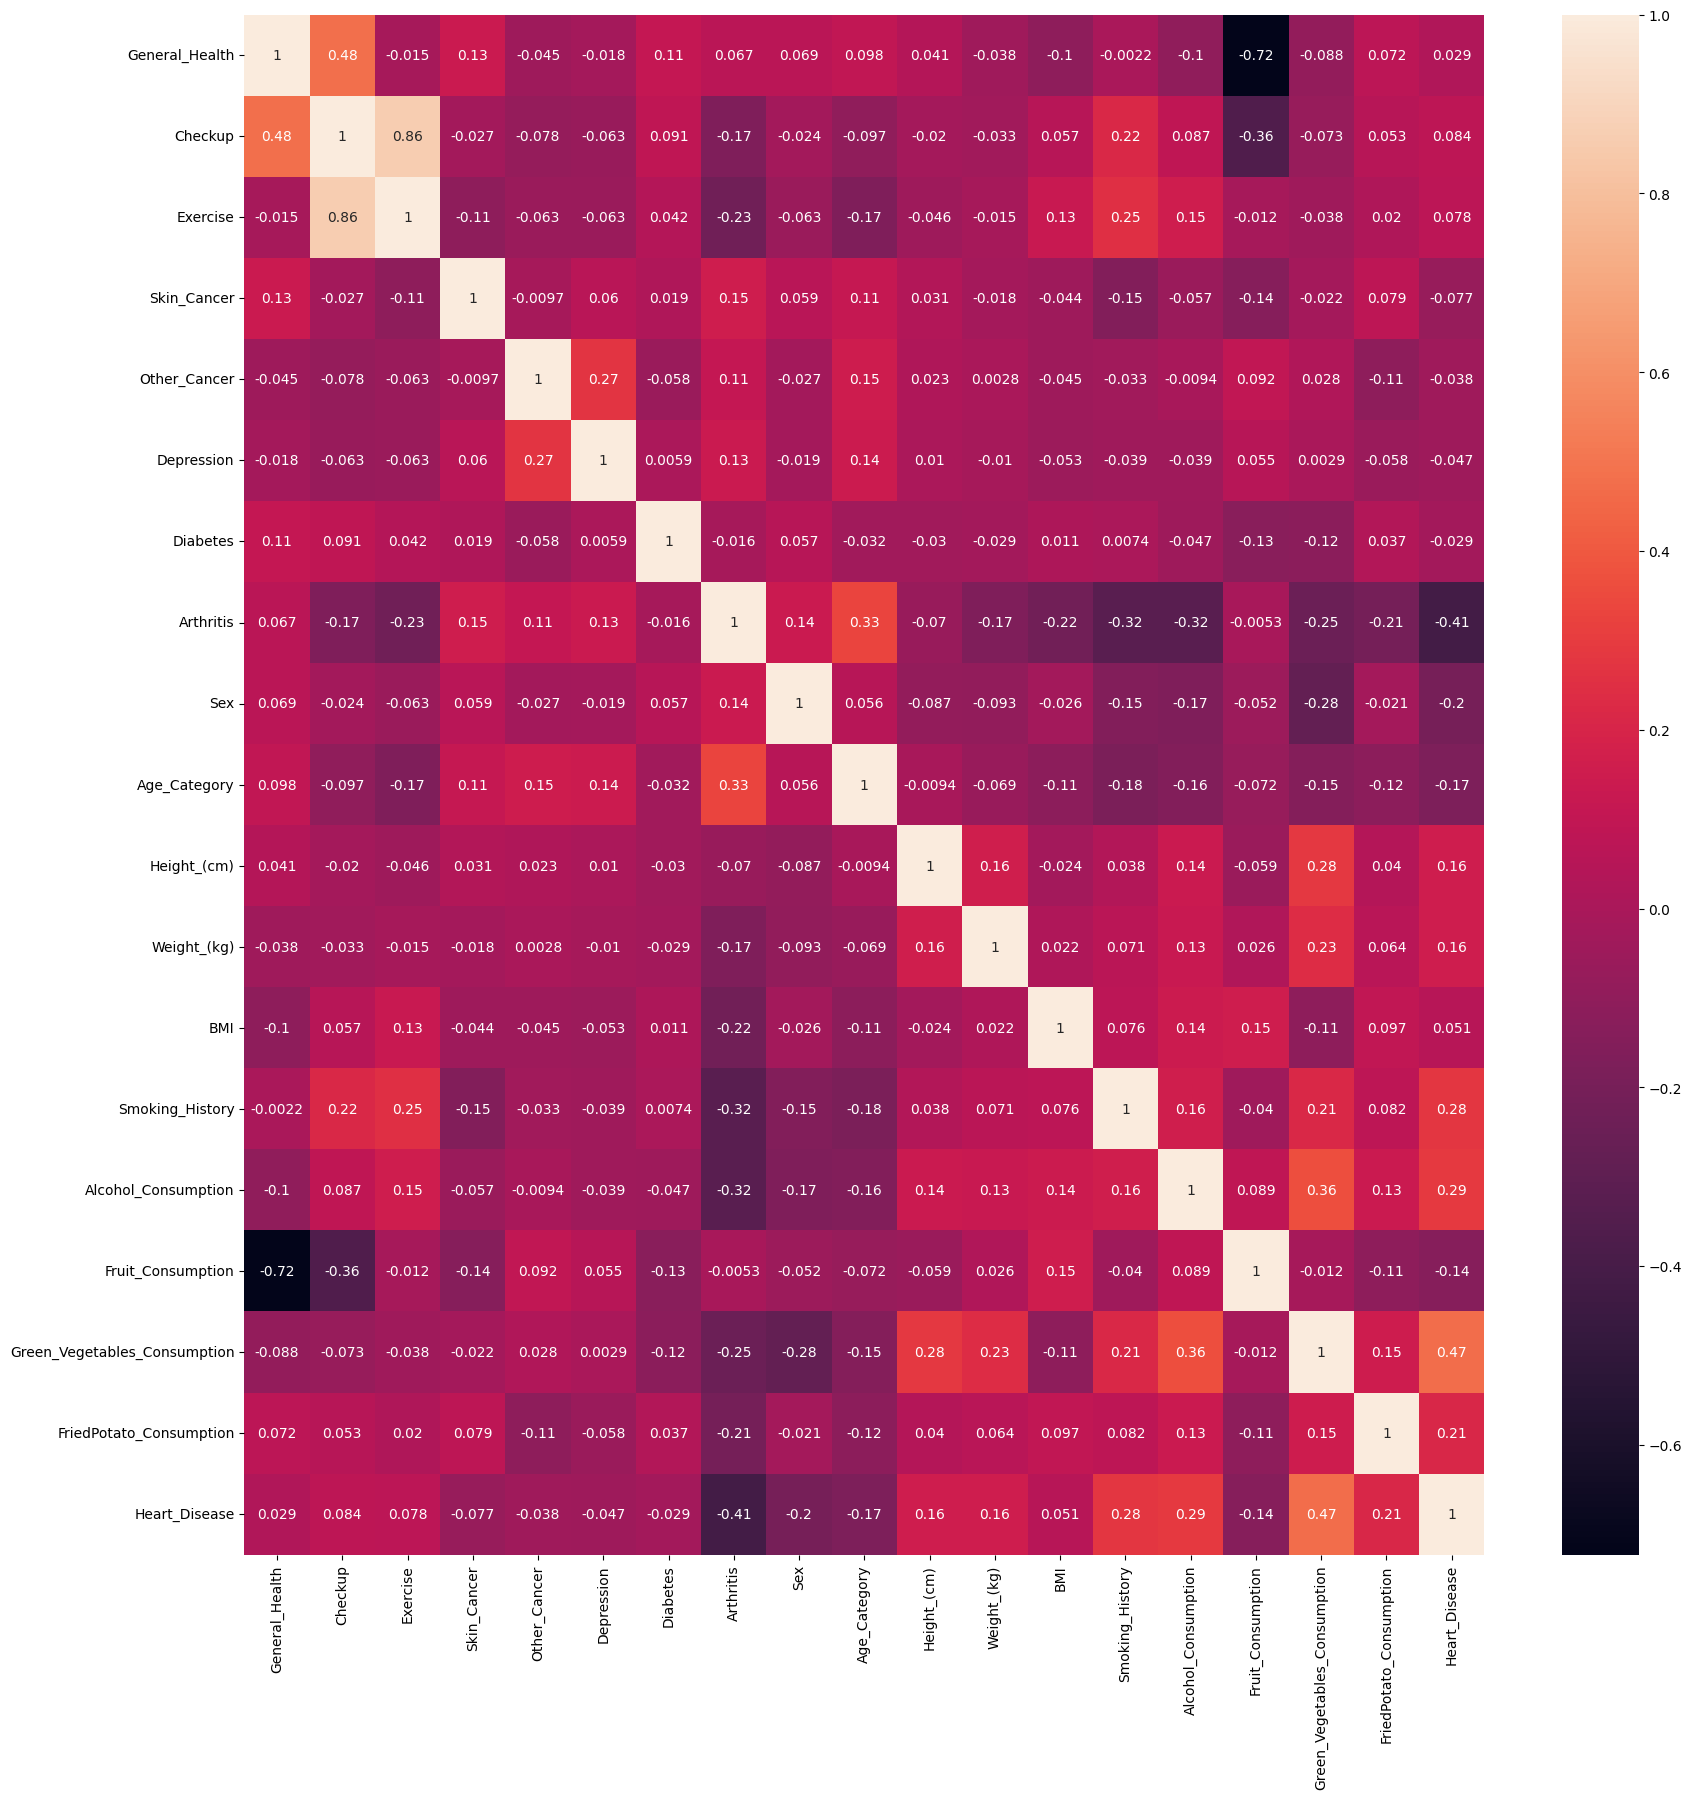

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
sns.heatmap(df['diabetes','heart_disease'].corr(),annot=True)

NameError: name 'sns' is not defined

In [3]:
dataset = pd.read_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_resampled.csv')
dataset.head()

,Unnamed: 0,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


In [4]:
dataset = dataset.drop('Unnamed: 0',axis=1)
dataset.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,150.0,32.66,14.54,0.0,30.0,16.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,0.0
1,165.0,77.11,28.29,0.0,30.0,0.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0
2,163.0,88.45,33.47,4.0,12.0,3.0,16.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,0.0
3,180.0,93.44,28.73,0.0,30.0,30.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0
4,191.0,88.45,24.37,0.0,8.0,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0


In [5]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [7]:
model=  RandomForestClassifier()

In [8]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
y_pred=  model.predict(X_test)

In [10]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.9560787399725161

In [11]:
def evaluate_models(models):
    try:
        # logging.info("Initiate Evaluation of Models.")
        accuracy_score_list = []
        precision_score_list = []
        recall_score_list = []
        f1_score_list = []

        for i in range(len(list(models.keys()))):
            model = list(models.values())[i]

            model.fit(X_train,y_train)

            y_pred = model.predict(X_test)

            accuracy_score_list.append(accuracy_score(y_pred=y_pred, y_true=y_test))
            precision_score_list.append(precision_score(y_pred=y_pred, y_true=y_test))
            recall_score_list.append(recall_score(y_pred=y_pred, y_true=y_test))
            f1_score_list.append(f1_score(y_pred=y_pred, y_true=y_test))

        # logging.info("Evaluation of Models Terminated Successfully.")
        return (
            accuracy_score_list,
            precision_score_list,
            recall_score_list,
            f1_score_list
        )


    except Exception as e:
        # logging.info("Error occured in Model Evaluation Process.")
        raise CustomException(e, sys)

In [15]:
models = {
            'Logistic Regression'      : LogisticRegression(),
            'Decision Tree'            : DecisionTreeClassifier(),
            'Naive Bayes'              : GaussianNB(),
            'Random Forest Classifier' : RandomForestClassifier()
        }

accuracy_score_list, precision_score_list, recall_score_list, f1_score_list = evaluate_models(models)
best_score_index = accuracy_score_list.index(max(accuracy_score_list))

best_accuracy_score = accuracy_score_list[best_score_index]
            
model_precsison_score = precision_score_list[best_score_index]
            
model_recall_score = recall_score_list[best_score_index]
            
model_f1_score = f1_score_list[best_score_index]

model_name = list(models.keys())[best_score_index]

best_model = list(models.values())[best_score_index]

In [16]:
print(accuracy_score_list)

[0.7754372159124276, 0.9224697854147825, 0.7606323627864366, 0.9559847781914707]


In [17]:
print(best_accuracy_score,model_name,model_precsison_score,model_recall_score,model_f1_score)

0.9559847781914707 Random Forest Classifier 0.9923989477411848 0.9192371223392416 0.9544180162866647
